In [290]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes = True)
from wordcloud import wordcloud

In [291]:
Hulu = pd.read_csv("../Data/Hulu_titles.csv") 

In [292]:
ls -al ../Data

total 31688
drwxr-xr-x@ 17 jaclynhuff  staff      544 Aug 22 11:50 ./
drwxr-xr-x@ 11 jaclynhuff  staff      352 Aug 22 13:38 ../
drwxr-xr-x@  6 jaclynhuff  staff      192 Aug 19 15:47 .ipynb_checkpoints/
-rw-r--r--   1 jaclynhuff  staff   631694 Aug 22 11:50 Amazon_Prime_Movies Data.ipynb
-rw-r--r--@  1 jaclynhuff  staff  1560860 Aug  1 14:57 HuluRaw.csv
-rw-r--r--   1 jaclynhuff  staff  2022635 Aug 15 16:47 Hulu_titles.csv
-rw-r--r--   1 jaclynhuff  staff  2022635 Aug  4 14:12 Netflix Data.csv
-rw-r--r--   1 jaclynhuff  staff    53968 Aug 17 12:30 Netflix90.csv
-rw-r--r--   1 jaclynhuff  staff  1362263 Aug 17 12:30 NetflixMOVIE.csv
-rw-r--r--   1 jaclynhuff  staff    38093 Aug  4 14:12 NetflixOriginals.csv
-rw-r--r--   1 jaclynhuff  staff   727496 Aug 17 12:30 NetflixSHOW.csv
-rw-r--r--   1 jaclynhuff  staff  2022635 Aug 17 09:59 Netflix_titles.csv
-rw-r--r--   1 jaclynhuff  staff  2034350 Aug 17 12:30 PythonRecodeforNetflix.csv
-rw-r--r--   1 jaclynhuff  staff   506067 Aug  4 14:12 S

## 1. Display Top 10 Rows Of The Dataset

In [293]:
Hulu.head(10) 

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600
5,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,"['comedy', 'european']",['GB'],4.0,tt0063929,8.8,73424.0,17.617,8.306
6,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,395024.0,17.770,7.800
7,tm14873,Dirty Harry,MOVIE,When a madman dubbed 'Scorpio' terrorizes San ...,1971,R,102,"['thriller', 'action', 'crime']",['US'],NaN,tt0066999,7.7,155051.0,12.817,7.500
8,tm119281,Bonnie and Clyde,MOVIE,"In the 1930s, bored waitress Bonnie Parker fal...",1967,R,110,"['crime', 'drama', 'action']",['US'],NaN,tt0061418,7.7,112048.0,15.687,7.500
9,tm98978,The Blue Lagoon,MOVIE,Two small children and a ship's cook survive a...,1980,R,104,"['romance', 'action', 'drama']",['US'],NaN,tt0080453,5.8,69844.0,50.324,6.156


## 2. Check Last 10 Rows Of The Dataset

In [294]:
Hulu.tail(10) 

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
5840,tm1216735,Sun of the Soil,MOVIE,"In 14th-century Mali, an ambitious young royal...",2022,NaN,26,[],[],NaN,NaN,NaN,NaN,1.179,7.0
5841,tm985215,Princess 'Daya'Reese,MOVIE,Reese is a con artist from Manila who dreams o...,2021,NaN,115,"['comedy', 'romance']",['PH'],NaN,tt13399802,7.1,50.0,1.383,NaN
5842,tm1066324,Super Monsters: Once Upon a Rhyme,MOVIE,The Super Monsters rethink exemplary fantasies...,2021,NaN,25,"['animation', 'family']",[],NaN,tt14586752,5.6,38.0,53.762,6.3
5843,tm1097142,My Bride,MOVIE,The story follows a young man and woman who go...,2021,NaN,93,"['romance', 'comedy', 'drama']",['EG'],NaN,tt14216488,5.0,327.0,2.545,5.3
5844,tm1074617,Bling Empire - The Afterparty,MOVIE,"The stars of ""Bling Empire"" discuss the show's...",2021,NaN,35,[],['US'],NaN,NaN,NaN,NaN,NaN,NaN
5845,tm1014599,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,NaN,100,"['romance', 'drama']",['NG'],NaN,tt13857480,6.8,45.0,1.466,NaN
5846,tm898842,C/O Kaadhal,MOVIE,A heart warming film that explores the concept...,2021,NaN,134,['drama'],[],NaN,tt11803618,7.7,348.0,NaN,NaN
5847,tm1059008,Lokillo,MOVIE,A controversial TV host and comedian who has b...,2021,NaN,90,['comedy'],['CO'],NaN,tt14585902,3.8,68.0,26.005,6.3
5848,tm1035612,Dad Stop Embarrassing Me - The Afterparty,MOVIE,"Jamie Foxx, David Alan Grier and more from the...",2021,PG-13,37,[],['US'],NaN,NaN,NaN,NaN,1.296,10.0
5849,ts271048,Mighty Little Bheem: Kite Festival,SHOW,"With winter behind them, Bheem and his townspe...",2021,NaN,7,"['family', 'animation', 'comedy']",[],1.0,tt13711094,7.8,18.0,2.289,10.0


## 3. Find Shape Of The Dataset(Number Of Rolls And Number Of Columns)

In [295]:
Hulu.shape

(5850, 15)

In [296]:
print("Number of Rows",Hulu.shape[0])
print("Numer of Columns",Hulu.shape[1])

Number of Rows 5850
Numer of Columns 15


In [297]:
Hulu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5850 entries, 0 to 5849
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5850 non-null   object 
 1   title                 5849 non-null   object 
 2   type                  5850 non-null   object 
 3   description           5832 non-null   object 
 4   release_year          5850 non-null   int64  
 5   age_certification     3231 non-null   object 
 6   runtime               5850 non-null   int64  
 7   genres                5850 non-null   object 
 8   production_countries  5850 non-null   object 
 9   seasons               2106 non-null   float64
 10  imdb_id               5447 non-null   object 
 11  imdb_score            5368 non-null   float64
 12  imdb_votes            5352 non-null   float64
 13  tmdb_popularity       5759 non-null   float64
 14  tmdb_score            5539 non-null   float64
dtypes: float64(5), int64(

In [298]:
print("Any missing value?",Hulu.isnull().values.any())

Any missing value? True


In [299]:
Hulu.isnull().sum()

id                         0
title                      1
type                       0
description               18
release_year               0
age_certification       2619
runtime                    0
genres                     0
production_countries       0
seasons                 3744
imdb_id                  403
imdb_score               482
imdb_votes               498
tmdb_popularity           91
tmdb_score               311
dtype: int64

<AxesSubplot:>

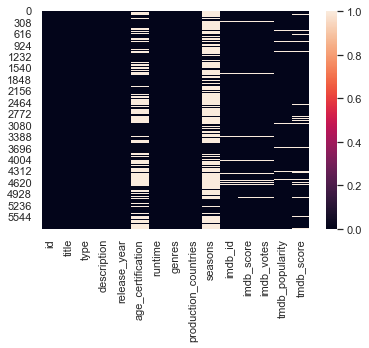

In [300]:
sns.heatmap(Hulu.isnull())

In [301]:
per_missing = Hulu.isnull().sum() * 100 / len(Hulu)
per_missing

id                       0.000000
title                    0.017094
type                     0.000000
description              0.307692
release_year             0.000000
age_certification       44.769231
runtime                  0.000000
genres                   0.000000
production_countries     0.000000
seasons                 64.000000
imdb_id                  6.888889
imdb_score               8.239316
imdb_votes               8.512821
tmdb_popularity          1.555556
tmdb_score               5.316239
dtype: float64

In [302]:
Hulu.dropna(axis=0)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
5,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,"['comedy', 'european']",['GB'],4.0,tt0063929,8.8,73424.0,17.617,8.306
26,ts45948,Monty Python's Fliegender Zirkus,SHOW,Monty Python's Fliegender Zirkus consisted of ...,1972,TV-MA,43,['comedy'],[],1.0,tt0202477,8.1,2151.0,1.487,7.000
35,ts20681,Seinfeld,SHOW,A stand-up comedian and his three offbeat frie...,1989,TV-PG,24,['comedy'],['US'],9.0,tt0098904,8.9,308824.0,130.213,8.301
44,ts22082,Knight Rider,SHOW,"Michael Long, an undercover police officer, is...",1982,TV-PG,51,"['scifi', 'action', 'crime', 'drama']",['US'],4.0,tt0083437,6.9,34115.0,50.267,7.500
45,ts21715,Thomas & Friends,SHOW,Thomas & Friends is a British children's telev...,1984,TV-Y,10,"['animation', 'family', 'comedy', 'fantasy', '...",['GB'],24.0,tt0086815,6.5,5104.0,42.196,6.500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5784,ts285471,The Wedding Coach,SHOW,Former bride and forever comedian Jamie Lee sh...,2021,TV-MA,33,"['comedy', 'reality']",['US'],1.0,tt14210424,5.0,87.0,1.525,10.000
5785,ts325991,Only Jokes Allowed,SHOW,Six of South Africa's top comedians take cente...,2022,TV-MA,16,['comedy'],['ZA'],1.0,tt17052148,4.9,45.0,1.629,10.000
5801,ts270616,We Are: The Brooklyn Saints,SHOW,A Brooklyn youth football program and its self...,2021,TV-14,47,"['documentation', 'sport']",['US'],1.0,tt13656220,6.5,162.0,2.523,10.000
5819,ts287729,Alma Matters: Inside the IIT Dream,SHOW,"In a ""nation of middle-class"" the IIT dream in...",2021,TV-MA,49,"['documentation', 'drama']",['IN'],1.0,tt14512938,8.3,2346.0,1.493,9.000


In [303]:
dup_Hulu=Hulu.duplicated().any() 

In [304]:
print("Are there an duplicate values?",dup_Hulu)

Are there an duplicate values? False


In [305]:
Hulu=Hulu.drop_duplicates()
Hulu

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5845,tm1014599,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,NaN,100,"['romance', 'drama']",['NG'],NaN,tt13857480,6.8,45.0,1.466,NaN
5846,tm898842,C/O Kaadhal,MOVIE,A heart warming film that explores the concept...,2021,NaN,134,['drama'],[],NaN,tt11803618,7.7,348.0,NaN,NaN
5847,tm1059008,Lokillo,MOVIE,A controversial TV host and comedian who has b...,2021,NaN,90,['comedy'],['CO'],NaN,tt14585902,3.8,68.0,26.005,6.300
5848,tm1035612,Dad Stop Embarrassing Me - The Afterparty,MOVIE,"Jamie Foxx, David Alan Grier and more from the...",2021,PG-13,37,[],['US'],NaN,NaN,NaN,NaN,1.296,10.000


In [306]:
Hulu.describe()  

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,5850.000000,5850.000000,2106.000000,5368.000000,5.352000e+03,5759.000000,5539.000000
mean,2016.417094,76.888889,2.162868,6.510861,2.343938e+04,22.637925,6.829175
std,6.937726,39.002509,2.689041,1.163826,9.582047e+04,81.680263,1.170391
min,1945.000000,0.000000,1.000000,1.500000,5.000000e+00,0.009442,0.500000
25%,2016.000000,44.000000,1.000000,5.800000,5.167500e+02,2.728500,6.100000
50%,2018.000000,83.000000,1.000000,6.600000,2.233500e+03,6.821000,6.900000
75%,2020.000000,104.000000,2.000000,7.300000,9.494000e+03,16.590000,7.537500
max,2022.000000,240.000000,42.000000,9.600000,2.294231e+06,2274.044000,10.000000


In [307]:
Hulu.imdb_score.describe()

count    5368.000000
mean        6.510861
std         1.163826
min         1.500000
25%         5.800000
50%         6.600000
75%         7.300000
max         9.600000
Name: imdb_score, dtype: float64

In [308]:
Hulu.columns

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score'],
      dtype='object')

## Question 1: How has the runtime of movies has changed over the years?

## In the past few years people feel the movies that we watch are getting longer and longer, or is that we are losing patiences? 

## As I checked and found what IMBD, definitons a video if it has a runtime of a minimum of 40 minutes is said to be a movie. So I decided to to filter out he ones that has a runtime less than 40 minutes from the dataset.


In [309]:
Hulu=Hulu[Hulu['runtime']>40] 

In [310]:
Hulu.describe() 

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,4645.000000,4645.000000,1085.000000,4357.000000,4.351000e+03,4574.000000,4414.00000
mean,2016.236168,90.454037,1.917972,6.467707,2.676360e+04,23.935988,6.69893
std,7.209608,31.672227,2.517412,1.159332,1.049536e+05,89.079166,1.10132
min,1945.000000,41.000000,1.000000,1.500000,5.000000e+00,0.009442,1.00000
25%,2016.000000,62.000000,1.000000,5.700000,6.150000e+02,2.776250,6.00000
50%,2018.000000,93.000000,1.000000,6.600000,2.662000e+03,6.802000,6.80000
75%,2020.000000,110.000000,2.000000,7.300000,1.165400e+04,16.670000,7.40000
max,2022.000000,240.000000,42.000000,9.600000,2.294231e+06,2274.044000,10.00000


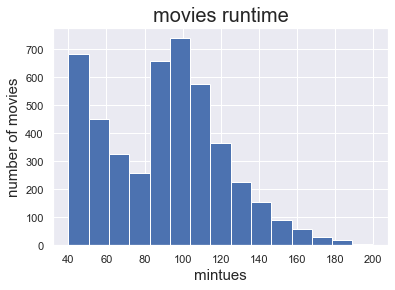

In [311]:
plt.hist(Hulu['runtime'],range = (40,200),bins = 15)
plt.title('movies runtime',fontsize = 20)
plt.xlabel('mintues',fontsize = 15)
plt.ylabel('number of movies', fontsize = 15)
plt.show() 

## As you can see from the Histogram above, that the majority of movies have a runtime between 90 to 110 mintues.

In [312]:
grouped_movies=Hulu['runtime'].groupby(Hulu['release_year']).describe()

In [313]:
avg_runtime_by_release_year = grouped_movies['mean']
avg_runtime_min = grouped_movies['mean'] - grouped_movies['std']
avg_runtime_max = grouped_movies['mean'] + grouped_movies['std']


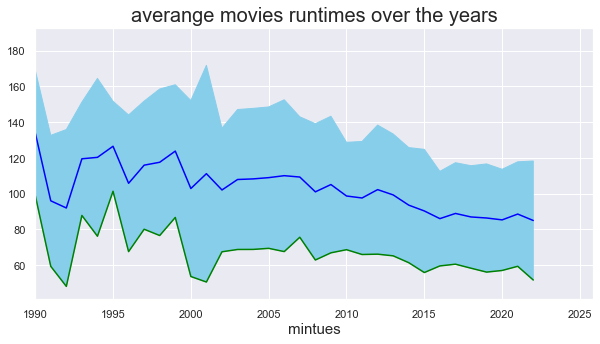

In [314]:
fig, x = plt.subplots(figsize=(10,5))
x.plot(avg_runtime_by_release_year,color = "blue")
x.plot(avg_runtime_min,color =  "green") 
x.fill_between(grouped_movies.index,avg_runtime_min,avg_runtime_max,color = "skyblue") 
x.set_title('averange movies runtimes over the years', fontsize = 20)
x.set_xlabel('release_year', fontsize = 15)
x.set_xlabel('mintues', fontsize = 15)
x.set_xlim(1990) 
plt.show()

In [320]:
movies_by_decades = Hulu.copy()
movies_by_decades['release'] = (( movies_by_decades['release_year']//10)*10).astype('int64')